# Smart Phone Price Range Prediction 

### Problem Statement:

In this task on smart phone price range prediction by using machine learning, our tasks is to prediction the prices range of the smart phones depending on its features such as battery power, clock speed, RAM etc. 

The data is collected from kaggle, link is given
https://www.kaggle.com/iabhishekofficial/mobile-price-classification

### Smart Phone Price Range Prediction with Python

I hope you have understood the above problem statement about predicting price range. Now, I will take you through a machine learning project on Smart phone price range prediction with Python. Let’s start by loading dataset and so on.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings(action="ignore")
df=pd.read_csv("data.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Each rows represent the features of a mobile phone and there are 21 columns all together. Now we will see the infomation of the data to check the quick description of the data

In [2]:
print (df.info())
print ("The Shape of the data is ", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

It has been noticed that there is no catagorical variable rather we have all numerical variable. This dataset consist of 2000 instances with 21 columns and note that there is no missing values present in it. 

We will now find out whether dataset is imbalance or not, for that we need to perform countplot from Seaborn library

<AxesSubplot:xlabel='price_range', ylabel='count'>

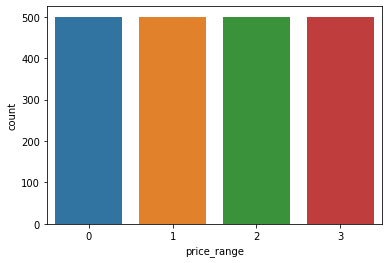

In [3]:
import seaborn as sns 
sns.countplot(df["price_range"])

It seems that the dependant variable that is price_range is totally balanced with four catagories. 

Now we need to seperate the numerical features into discrete and continious features. 

##### Discrete Features

In [4]:
discrete_features=[feature for feature in df.columns
                  if len(df[feature].unique())<25]  
len(discrete_features)

14

I have taken a threshold of 25 catagories, this threshold will depend from one person to another rather we can say that it is domain specific.
By taken this threshold we got 14 features which are discrete.

Now with the help of groupby funtion we will see the **relationship between the discrete variables and price_range**

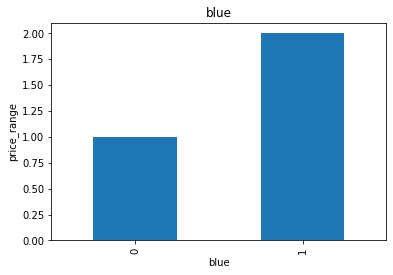

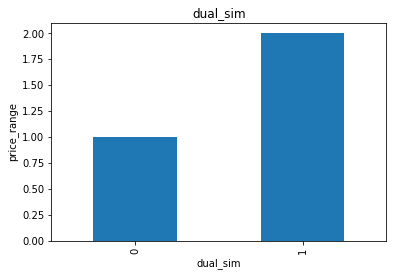

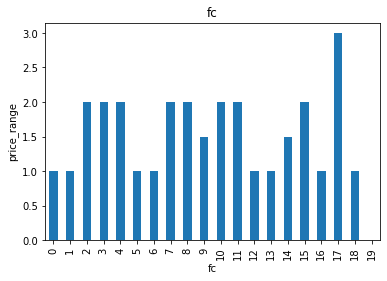

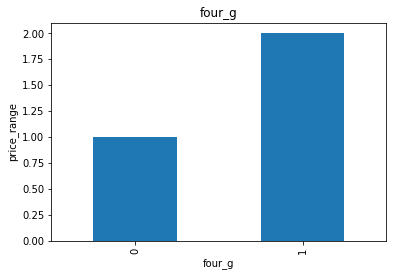

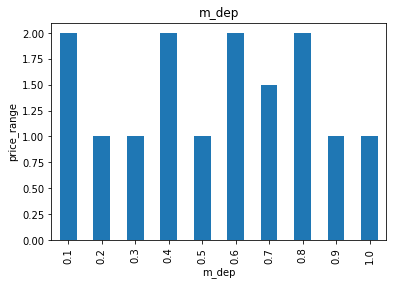

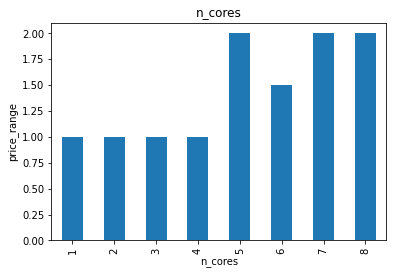

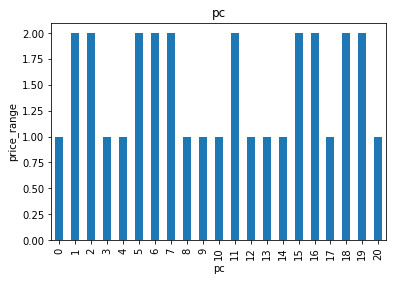

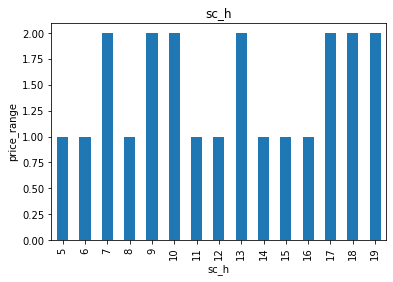

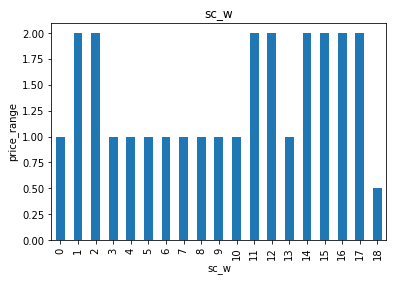

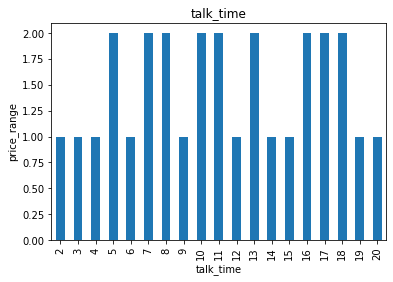

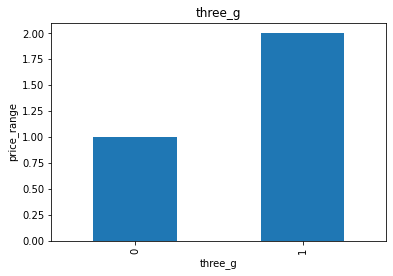

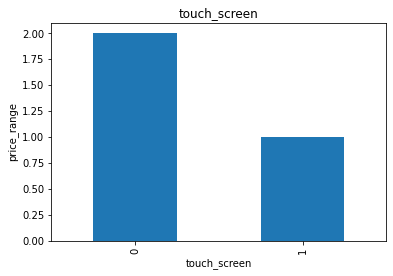

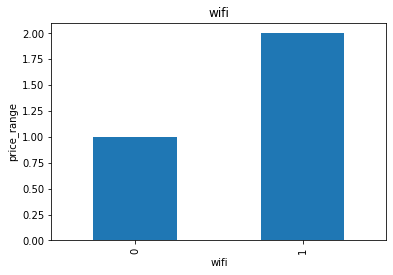

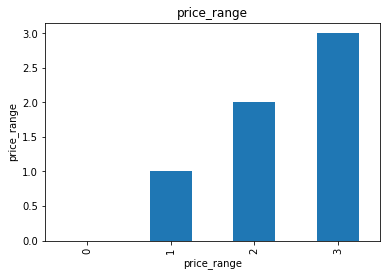

In [5]:
import matplotlib.pyplot as plt
for feature in discrete_features:
    df.groupby(feature)["price_range"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("price_range")
    plt.title(feature)
    plt.show()

It is the relationship between the discrete features and the price range of the smart phones. 
It has been seen that with the increase in features value of some smart phone does"t increase the price range alot, it become saturated at times.

##### Continious_features

In [6]:
continious_features=[feature for feature in df.columns
                    if feature not in discrete_features]
len(continious_features)

7

From the total dataset which ever feature are not in discrete_features are continious features. There are 7 features which are contionious in nature.

Now with the help of groupby funtion we will see the **relationship between the continious variables and price_range**

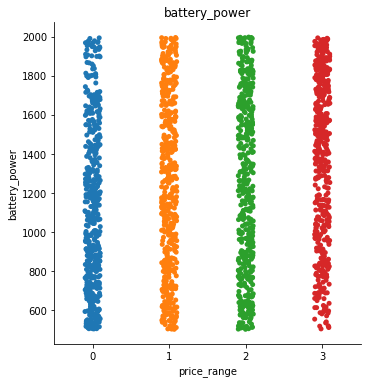

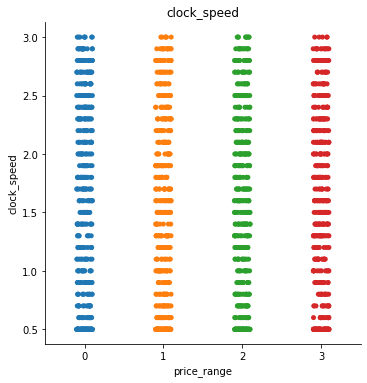

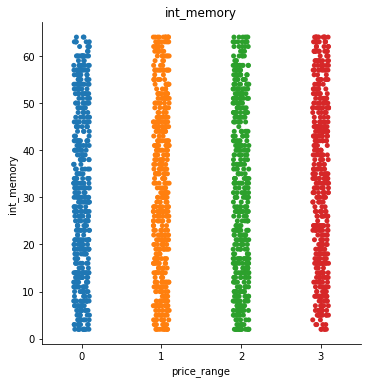

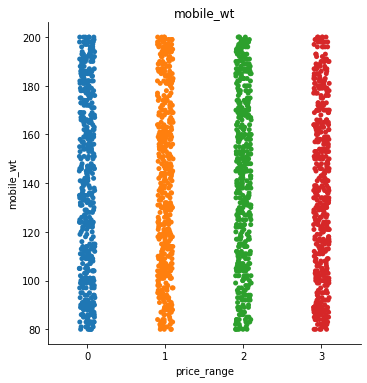

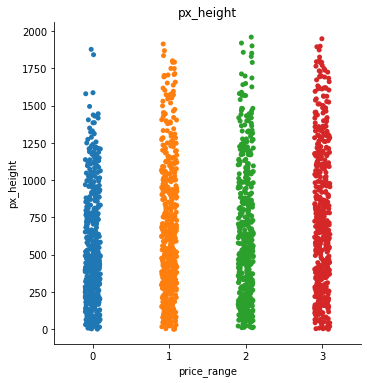

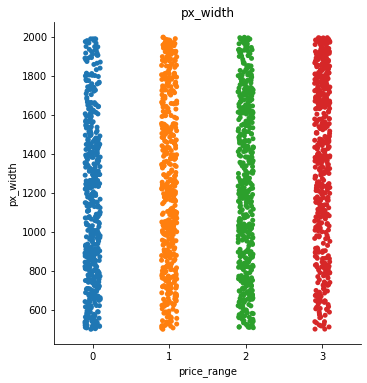

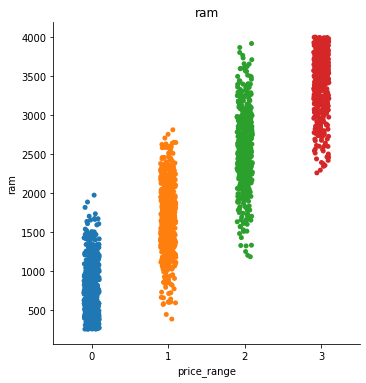

In [7]:
for feature in continious_features:
    sns.catplot(x="price_range", y=feature, data=df)
    plt.xlabel("price_range")
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

It is the relationship between the continious features and the price range of the smart phones.

From **RAM** we have seen that you can get a 500mb ram with catagory 1 price range whereas 2GB is the highest range for catagory 1 price range.

Other than that all the features are uniform throughout price range


Now we will check **Outliers of the features** 

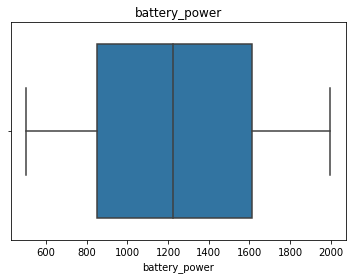

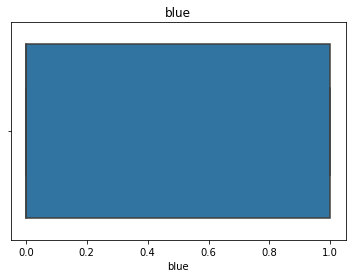

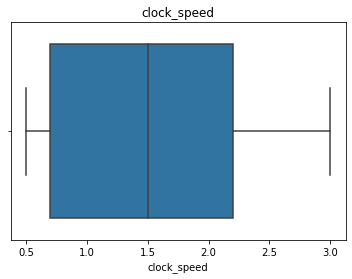

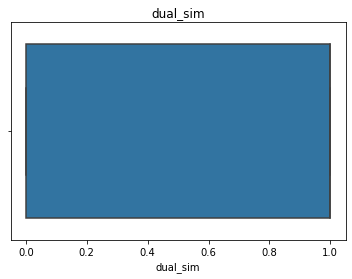

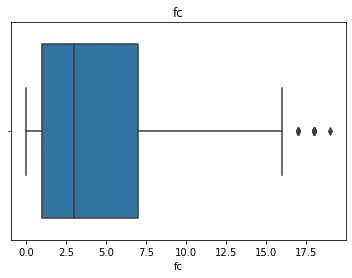

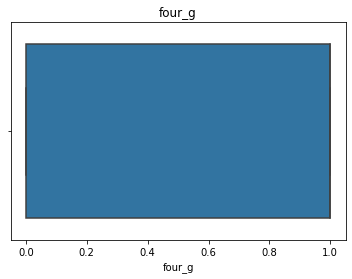

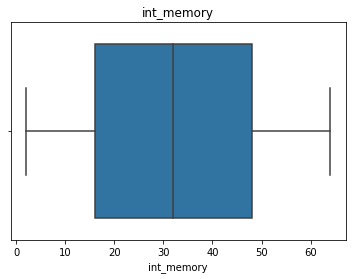

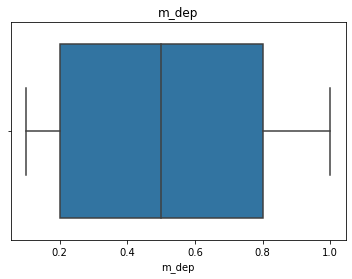

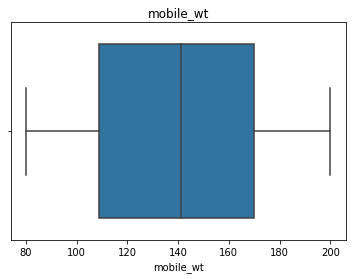

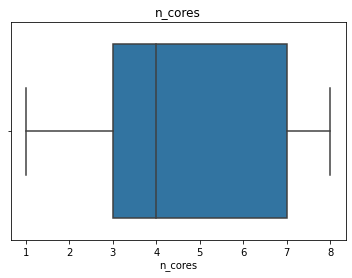

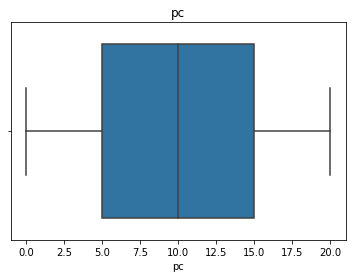

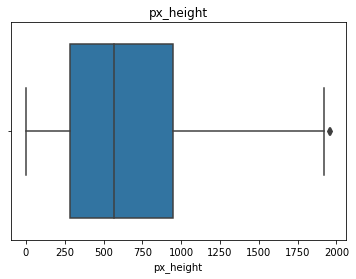

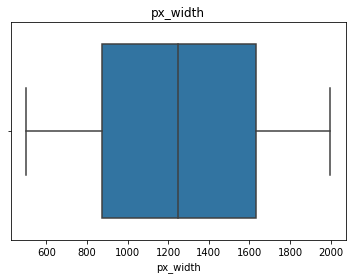

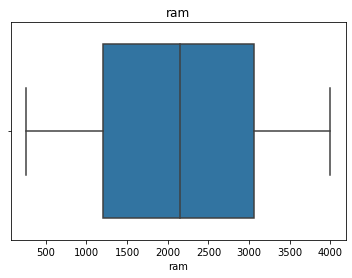

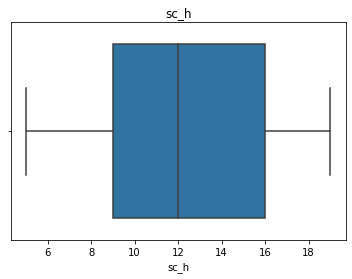

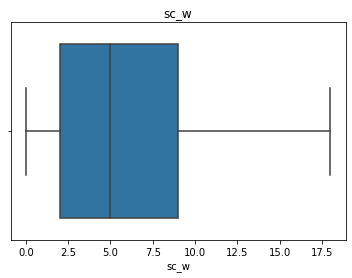

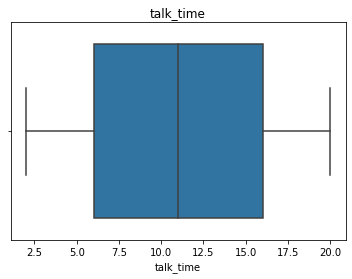

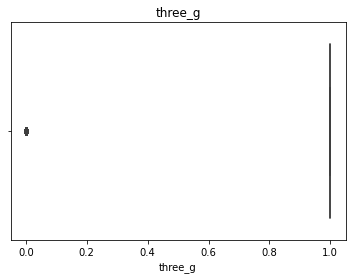

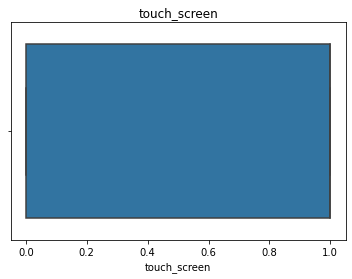

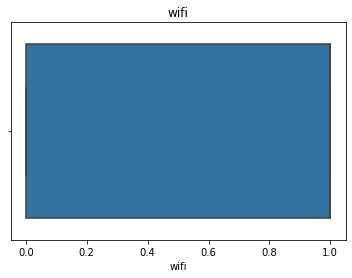

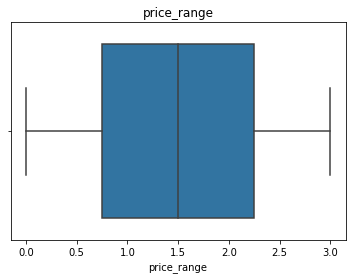

In [8]:
for feature in df.columns:
    sns.boxplot(df[feature])
    plt.title(feature)
    plt.show()

As we have seen that there is no such outlier present in the dataset so we are good to go with the process. 


Now we will divide the feature into **dependant and independant features** 

In [3]:
# Independant feature
X=df.drop("price_range",axis=1)
X.shape

(2000, 20)

In [5]:
# Dependant feature 
y=df.iloc[:,[20]]
y.shape

(2000, 1)

We have seperate the features into dependant and independant.

We have also seen that there are 20 features in independant features and obviously that all the 20 features are not usefull to predict the prices.

So we have to perform **Feature Selection methods to identify which features is more importance and which features is less importance**.

Now we will perform two feature selection methods **SelectKbest & Feature Importance**

##### SelectKbest

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

top_score=SelectKBest(score_func=chi2,k=20)
top_score.fit(X,y)
top_score.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

SelectKbest generate scores of the features by the help of Chi2, here "k" stands for how many elements you want to see the scores.

From this output we cannot identify which features has what score and which is highest, for that I need to create a dataframe so that we could umderstand.

In [12]:
df.score=pd.DataFrame(top_score.scores_ ,columns=["Scores"])
df.feature=pd.DataFrame(X.columns,columns=["Features"])
after_concat=pd.concat([df.feature,df.score],axis=1)
after_concat.nlargest(20,"Scores")

,Features,Scores
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


From this feature selection we have seen that **RAM, px_height, battery_power, px_width, mobile_wt** plays a important role in predicting price range, whereas **dual_sim, wifi** are not important in this case.

Lets find out another methods of feature selection.

##### Feature Importances

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
imp=ExtraTreesClassifier()
imp.fit(X,y)
imp.feature_importances_

array([0.06181178, 0.01901543, 0.03336598, 0.02028393, 0.0320262 ,
       0.01658851, 0.03448344, 0.03367934, 0.03599048, 0.03201805,
       0.03260209, 0.04737736, 0.047592  , 0.39706055, 0.03429442,
       0.03467895, 0.0343977 , 0.01452103, 0.01794413, 0.02026862])

ExtraTreesClassifier is an ensemble learning method fundamentally based on decision trees. 

Extra Trees is like Random Forest, in that it builds multiple trees and splits nodes using random subsets of features, but with two key differences: 

it does not bootstrap observations (meaning it samples without replacement), and nodes are split on random splits, not best splits. So, in summary, ExtraTrees:

   **-builds multiple trees with bootstrap = False by default, which means it samples without replacement.**
   
   **-nodes are split based on random splits among a random subset of the features selected at every node.**
   
From this output we cannot identify which features has what importance and which is highest, for that I need to create a dataframe so that we could umderstand.

In [14]:
df.importance=pd.DataFrame(imp.feature_importances_,columns=["Importances"])
df.features=pd.DataFrame(X.columns,columns=["Features"])
after_concat1=pd.concat([df.features,df.importance],axis=1)
after_concat1.nlargest(20,"Importances")

,Features,Importances
13,ram,0.397061
0,battery_power,0.061812
12,px_width,0.047592
11,px_height,0.047377
8,mobile_wt,0.035990
15,sc_w,0.034679
6,int_memory,0.034483
16,talk_time,0.034398
14,sc_h,0.034294
7,m_dep,0.033679


One thing is clear from this method is **ram, battery_power, px_width, px_height,mobile_wt** are important for model prediction.


Now we will perform **Correlation** between them

##### Correlation

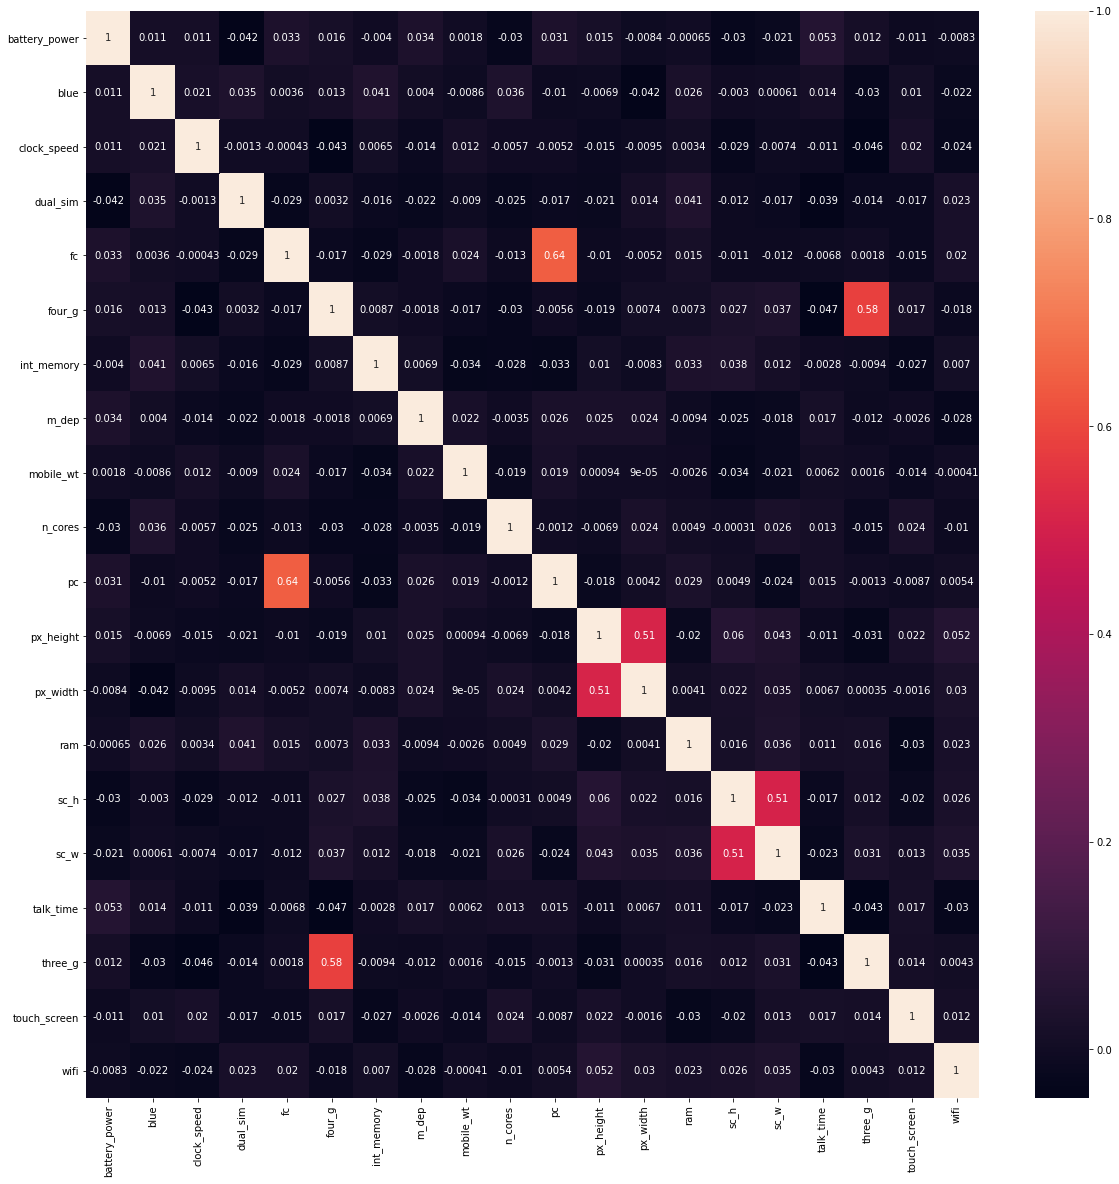

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(X.corr(),annot=True)
plt.show()

It is the correlation of the features and it ranges from near zero to 1 

Now we will define a threshold so that we will eliminate higher correlated features from the independant variables 

In [16]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [17]:
print("Highly correlated feature with 0.6 or above correlation is ",correlation(X,0.6))

Highly correlated feature with 0.6 or above correlation is  {'pc'}


It has been seen that only one feature is highly correlated and that feature will be eliminated.

After feature selection we came to a conclusion that based on **SelectKbest, Feature Importances and Correlation** we will select **ram,battery_power,internal_memory and n_core**



Updating the independant variable

In [6]:
X=X.loc[:,["ram","battery_power","int_memory","n_cores"]]
X.head()

,ram,battery_power,int_memory,n_cores
0,2549,842,7,2
1,2631,1021,53,3
2,2603,563,41,5
3,2769,615,10,6
4,1411,1821,44,2



Now with the help of this features we will predict the price range of the mobile phone. For that we are considering **three machine learning models**

- KNN Classifier
- Decision Tree Classifier
- Random Forest Classifier

***Note that we are not using Logistic Regression and Support Vector Classifier,we knew we can solve multiclass problem with logistic regression and SVC by one vs one and ove vs rest models with respect to classes but here I am not using logistic regression and SVC for prediction.***

### Train Test Split

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)
print(X_train.shape,X_test.shape)

(1500, 4) (500, 4)


We are splitting the data by train and test with 25% test and 75% train. 

### Building Models

##### KNN CLassification 

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

We have taken the n_neighbor=1 and we will note the accuracy then we will hyperparater the n_neighbor and find the appropiate value for it.

##### Prediction

In [9]:
y_knn_pred=knn.predict(X_test)

##### Confusion Matrix

In [10]:
from sklearn import metrics
metrics.confusion_matrix(y_test,y_knn_pred)

array([[110,  22,   0,   0],
       [ 17,  80,  21,   0],
       [  0,  17,  82,  21],
       [  0,   0,  27, 103]])

In confusion matrix we have true positive, true negative, false postive and false negative, but it is usefull in binary classification problem.
When it comes to multiclass classificAtion problem we cannot use the term true positive, true negative, false postive and false negative.
If we want to see the accuracy then sum it up the diagonal elements and divide it by all the elements.

##### Classification Report

In [11]:
print(metrics.classification_report(y_test,y_knn_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       132
           1       0.67      0.68      0.68       118
           2       0.63      0.68      0.66       120
           3       0.83      0.79      0.81       130

    accuracy                           0.75       500
   macro avg       0.75      0.75      0.75       500
weighted avg       0.75      0.75      0.75       500



**Accuracy is 75%**

First we have to understand what is precision and recall.

If we take only the price range class 0 then the precision will be of all where we predict class 0 what fraction is actually class 0 and for recall is of all where the actual is class 0 what fraction we have predicted correctlly.

Now we are hyperparameter the parameter of KNN that is n_neighbors, so that we could get a value which will give a better accuracy.

For that we will create a space where we will place 96 numbers starting from 5 to 100. 

In [13]:
import numpy as np
rand_space_knn={"n_neighbors":[int(x) for x in np.linspace(start=5,stop=100,num=96)]}

We will be using **RandomizedSearchCV** for hyperparameter 

In [14]:
from sklearn.model_selection import RandomizedSearchCV
knn_hyper=KNeighborsClassifier()
rand_knn=RandomizedSearchCV(estimator=knn_hyper,param_distributions=rand_space_knn,
                           n_iter=200,cv=5,n_jobs=-1,verbose=2)
rand_knn.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    8.2s finished


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'n_neighbors': [5, 6, 7, 8, 9, 10, 11,
                                                        12, 13, 14, 15, 16, 17,
                                                        18, 19, 20, 21, 22, 23,
                                                        24, 25, 26, 27, 28, 29,
                                                        30, 31, 32, 33, 34, ...]},
                   verbose=2)

After hyperparameter we are geting the best parameter of n_neighbors 

In [15]:
rand_knn.best_params_

{'n_neighbors': 14}

After geting the best parameter we will deployed it in the KNN algorithim

In [16]:
knn_14=KNeighborsClassifier(n_neighbors=14)
knn_14.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

##### Prediction

In [17]:
y_knn_14_pred=knn_14.predict(X_test)

##### Confusion Matrix 

In [18]:
metrics.confusion_matrix(y_test,y_knn_14_pred)

array([[120,  12,   0,   0],
       [ 16,  91,  11,   0],
       [  0,  22,  83,  15],
       [  0,   0,  27, 103]])

##### Classification Report

In [19]:
print(metrics.classification_report(y_test,y_knn_14_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       132
           1       0.73      0.77      0.75       118
           2       0.69      0.69      0.69       120
           3       0.87      0.79      0.83       130

    accuracy                           0.79       500
   macro avg       0.79      0.79      0.79       500
weighted avg       0.80      0.79      0.79       500



**Accuracy is 79%**


As we have seen that the accuracy has increased by 4% where as precision and recall are also increased significantly.

Now we will move to our next model **Decision Tree Classifier**

##### Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

##### Prediction 

In [21]:
y_dtc_pred=dtc.predict(X_test)

##### Confusion Matrix

In [22]:
metrics.confusion_matrix(y_test,y_dtc_pred)

array([[107,  24,   1,   0],
       [ 16,  85,  16,   1],
       [  0,  22,  73,  25],
       [  0,   0,  28, 102]])

##### Classification Report 

In [23]:
print(metrics.classification_report(y_test,y_dtc_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       132
           1       0.65      0.72      0.68       118
           2       0.62      0.61      0.61       120
           3       0.80      0.78      0.79       130

    accuracy                           0.73       500
   macro avg       0.73      0.73      0.73       500
weighted avg       0.74      0.73      0.74       500



**Accuracy is 73%**

Let see by hyperparameter tuning of the parameters of Decision tree will we increase the accuracy of the model.

For that we have to define a space 

In [24]:
rand_space_DT={"criterion":["gini","entropy"],
              
              "splitter":["best","random"],
              "min_samples_split":[2, 5, 10, 15, 100],
              "min_samples_leaf":[1, 2, 5, 10],
              "max_features":["auto","sqrt","log2"]}

We will use **RandomisedSearchCV** for hyperparameter tuning

In [25]:
dtc_hyper=DecisionTreeClassifier()
dtc_rand=RandomizedSearchCV(estimator=dtc_hyper,param_distributions=rand_space_DT,n_iter=100,
                           cv=5,verbose=2,n_jobs=-1,random_state=42)
dtc_rand.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.1s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'splitter': ['best', 'random']},
                   random_state=42, verbose=2)

In [26]:
dtc_rand.best_params_

{'splitter': 'best',
 'min_samples_split': 15,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'criterion': 'gini'}

In [27]:
dtc_hyperameter=DecisionTreeClassifier(splitter="best",min_samples_split=15,
                                      min_samples_leaf=10,max_features="sqrt",criterion="gini")
dtc_hyperameter.fit(X_train,y_train)

DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=10,
                       min_samples_split=15)

##### Prediction

In [28]:
y_dtchyper_pred=dtc_hyperameter.predict(X_test)

##### Confusion Matrix

In [29]:
metrics.confusion_matrix(y_test,y_dtchyper_pred)

array([[116,  16,   0,   0],
       [ 21,  80,  17,   0],
       [  0,  22,  82,  16],
       [  0,   1,  40,  89]])

##### Classification Score 

In [30]:
print(metrics.classification_report(y_test,y_dtchyper_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       132
           1       0.67      0.68      0.68       118
           2       0.59      0.68      0.63       120
           3       0.85      0.68      0.76       130

    accuracy                           0.73       500
   macro avg       0.74      0.73      0.73       500
weighted avg       0.74      0.73      0.74       500



**Accuracy is 73%**

It has been seen that the accuracy is same as before same as precision and recall. This decrease may be due to overfiting.



Now we will move to our last model which is **Random Forest Classifier.**

##### Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

##### Prediction

In [32]:
y_rfc_pred=rfc.predict(X_test)

##### Confusion Matrix

In [33]:
metrics.confusion_matrix(y_test,y_rfc_pred)

array([[119,  13,   0,   0],
       [ 13,  89,  16,   0],
       [  0,  20,  81,  19],
       [  0,   0,  27, 103]])

##### Classification Report

In [34]:
print(metrics.classification_report(y_test,y_rfc_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       132
           1       0.73      0.75      0.74       118
           2       0.65      0.68      0.66       120
           3       0.84      0.79      0.82       130

    accuracy                           0.78       500
   macro avg       0.78      0.78      0.78       500
weighted avg       0.79      0.78      0.78       500



**Accuracy is 78%**


From this we could conclude that KNN Classifier has better perfomance than Decision tree and Random forest.

We will now dump the model to the desired folder.

In [44]:
import pickle
# open a file, where you ant to store the data
file = open('KNN_hyper_14.pkl', 'wb')

# dump information to that file
pickle.dump(knn_14, file)